# SCIPY Courses

Alors nous allons voir comment faire du calcul scientifique avec "scipy".

A l'intérieur de cet package on retrouve des outils absolument incroyables pour faire 
du machine learning. Et bizzarement pas mal de Data Scientists oublient de les utiliser ces outils là...

En l'occurrence on va voir comment faire des interpolations, de l'optimization de problème, du traitement du signal.
Et ça va inclure la transformée de Fourier qui est extrêmement puissant pour filtrer des signaux et on terminera ceci en voyant comment faire du traitement d'images avec "NdImage"

Alors quand on consulte la documentation officielle de scipy qui est disponible à cette addresse:

[https://docs.scipy.org/doc/scipy/reference/](https://docs.scipy.org/doc/scipy/reference/)

Et bien on peut se rendre compte que dans scipy, on a tout un tas de petits modules qui nous permettent de faire des actions scientifiques bien précises.

Par exemple on va retrouver un module pour faire de l'algèbre linéaire (**scipy.sparse.linalg**) ou un module pour faire des statistiques (**scipy.stats**)... En fait, c'est un peu comme dans **numpy**.

Donc on va s'intéresser au module **scipy.interpolate**:


## 1) Interpolation

En data science, il arrive souvent qu'on ait à disposition des datasets dans lesquels il manque des valeurs...

Il peut avoir plein de raisons à çà... Par exemple on peut avoir deux capteurs qui collectent des données avec des fréquences d'acquisition différentes:

Par exemple, **le capteur1** récolte des données chaque seconde et **le capteur2** chaque 3 secondes, alors quand on est dans ce genre de situation, on peut se dire...

Ah ouais, c'est dommage, on peut seulement se servir d' 1/3 de nos données vue que les 2/3 restants il y'a des problèmes de correspondances entre nos deux signaux...

Sauf que ces valeurs, ne sont pas pour autant gâchées à condition qu'on puisse les interpoler...

Alors pour illustrer tout çà imaginons que le capteur 2 nous donne ceci

In [10]:
import numpy as np
import matplotlib.pyplot as plt

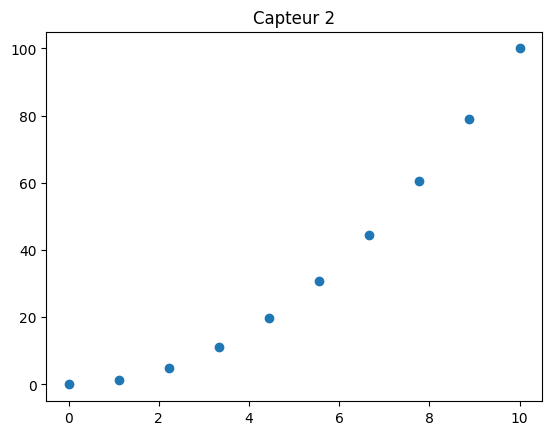

In [13]:
x = np.linspace(0, 10, 10)
y = x ** 2
plt.scatter(x, y)
plt.title("Capteur 2")
plt.show()

In [15]:
# Nous ce qu'on aimerait faire, c'est d'interpoler, c'est à dire de placer plus de points entre nos différents points bleus

# Alors pour faire cette interpolation, on va utiliser la fonction, "interp1d" qui est à l'intérrieur du module scipy.interpolate

from scipy.interpolate import interp1d

In [ ]:
# Cette fonction va nous permettre de générer une autre fonction, disons f qui sera notre fonction 